In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

W0621 11:18:46.663933 139819073562496 deprecation.py:323] From <ipython-input-2-25f3bfc0dcce>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0621 11:18:46.670040 139819073562496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0621 11:18:46.672486 139819073562496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0621 11:18:47.016542 139819073562496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0621 11:18:47.087283 139819073562496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


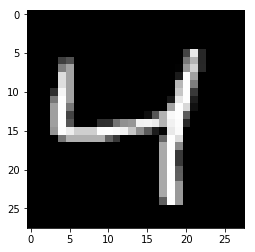

In [0]:
mnist=input_data.read_data_sets('MNIST_data',validation_size=0)
img=mnist.train.images[2]
plt.imshow(img.reshape((28,28)),cmap='gray')

In [0]:
learning_rate=0.001
inputs_=tf.placeholder(tf.float32,(None,28,28,1),name='inputs')
targets_=tf.placeholder(tf.float32,(None,28,28,1),name='targets')

conv1=tf.layers.conv2d(inputs_,32,(3,3),padding='same',activation=tf.nn.relu)
maxpool1=tf.layers.max_pooling2d(conv1,(2,2),(2,2),padding='same')

conv2=tf.layers.conv2d(maxpool1,32,(3,3),padding='same',activation=tf.nn.relu)
maxpool2=tf.layers.max_pooling2d(conv2,(2,2),(2,2),padding='same')

conv3=tf.layers.conv2d(maxpool2,16,(3,3),padding='same',activation=tf.nn.relu)
maxpool3=tf.layers.max_pooling2d(conv3,(2,2),(2,2),padding='same')

upsample1=tf.image.resize_nearest_neighbor(maxpool3,(7,7))
conv4=tf.layers.conv2d(upsample1,16,(3,3),padding='same',activation=tf.nn.relu)

upsample2=tf.image.resize_nearest_neighbor(conv4,(14,14))
conv5=tf.layers.conv2d(upsample2,32,(3,3),padding='same',activation=tf.nn.relu)

upsample3=tf.image.resize_nearest_neighbor(conv5,(28,28))
conv6=tf.layers.conv2d(upsample3,32,(3,3),padding='same',activation=tf.nn.relu)

logits=tf.layers.conv2d(conv6,1,(3,3),padding='same',activation=None)
out=tf.nn.sigmoid(logits,name='output')

loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
cost=tf.reduce_mean(loss)
opt=tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
sess=tf.Session()
epochs=20
batch_size=512
noise_factor=0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
  for ii in range(mnist.train.num_examples // batch_size):
    batch=mnist.train.next_batch(batch_size)
    imgs=batch[0].reshape((-1,28,28,1))
    
    noisy_imgs = imgs + noise_factor*np.random.randn(*imgs.shape)
    noisy_imgs = np.clip(noisy_imgs,0.,1.)
    
    batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs, targets_: imgs})
  print("Epoch: {}/{}...".format(e+1, epochs),
        "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.2047
Epoch: 2/20... Training loss: 0.1744
Epoch: 3/20... Training loss: 0.1606
Epoch: 4/20... Training loss: 0.1452
Epoch: 5/20... Training loss: 0.1411
Epoch: 6/20... Training loss: 0.1342
Epoch: 7/20... Training loss: 0.1300
Epoch: 8/20... Training loss: 0.1277
Epoch: 9/20... Training loss: 0.1257
Epoch: 10/20... Training loss: 0.1245
Epoch: 11/20... Training loss: 0.1230
Epoch: 12/20... Training loss: 0.1201
Epoch: 13/20... Training loss: 0.1195
Epoch: 14/20... Training loss: 0.1198
Epoch: 15/20... Training loss: 0.1192
Epoch: 16/20... Training loss: 0.1157
Epoch: 17/20... Training loss: 0.1175
Epoch: 18/20... Training loss: 0.1172
Epoch: 19/20... Training loss: 0.1142
Epoch: 20/20... Training loss: 0.1152


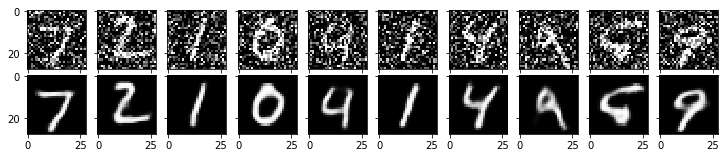

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(10,2))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(out, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)

fig.tight_layout(pad=0.1)